### Exploratory data analysis(EDA)

In this notebook we will go through the data-set to investigate it and plot some figures to get better understanding of the database.

In [13]:
# Imports
import os
import matplotlib.pyplot as plt
import os
import numpy as np
os.sys.path
os.chdir('./')
DATAPATH = 'trafficsigns_dataset'

In [14]:
# sign shapes classes list 
SignShapeClasses = [ name for name in os.listdir(DATAPATH) if os.path.isdir(os.path.join(DATAPATH, name)) ]
# number of classes in shape category
nOfSignShapeClasses = len(SignShapeClasses)
# dictionary to store each shape class and it's type classes and how many images in each type class
data_dict = dict()

for c in os.listdir(DATAPATH):
    # check directories only
    if not os.path.isdir(os.path.join(DATAPATH, c)):
        continue
    # assign empty dictionary at first for each shape class to store type classes
    data_dict[c] = {'signTypes': dict()}
    # join paths to get each sign shape class path
    signShapePath = os.path.join(DATAPATH, c)
    # loop over sign types classes in each sign shape class
    for k in os.listdir(signShapePath):
        # join paths to get each sign type class path
        signTypePath = os.path.join(signShapePath, k)
        # check directories only
        if os.path.isdir(signTypePath):
            # assign the count of images in each sign type class
            data_dict[c]['signTypes'][k] = len(os.listdir(signTypePath))
# Display the resulted dictionary
# this dict will be used in plotting to get better visual understanding of the data
data_dict


{'triangle': {'signTypes': {'giveway': 231, 'warning': 696}},
 'round': {'signTypes': {'noentry': 375,
   'noparking': 242,
   'limitedtraffic': 125,
   'traveldirection': 124,
   'bicycle': 285,
   'trafficdirective': 195,
   'speed': 316,
   'roundabout': 98}},
 'square': {'signTypes': {'laneend': 118,
   'continue': 199,
   'crossing': 95,
   'parking': 276}},
 'hex': {'signTypes': {'stop': 43}},
 'diamond': {'signTypes': {'rightofway': 282}}}

In [15]:
# fucn to calculate the percentage and abs of each class images count
def calc_percent_abs(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)

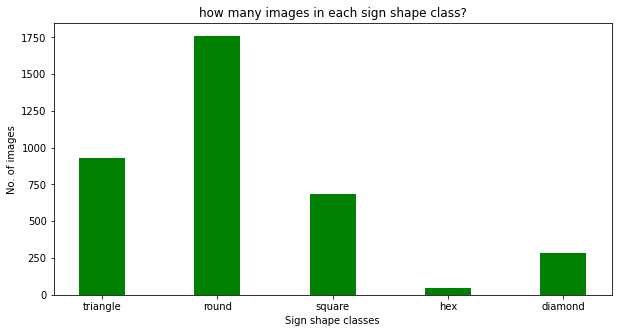

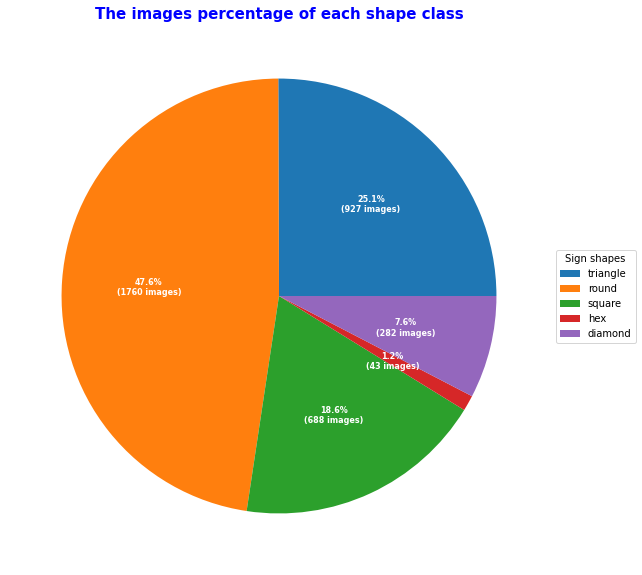

In [16]:
# create two lists, one to store names of sign shapes classes
# the other one will store the count of images in each sign shape class 
SignShapeClassesValues = []
for key, value in data_dict.items():
    SignShapeClassesValues.append(sum(value['signTypes'].values()))
# plot the number of images in each sign shape class in bar plot and pie chart
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(SignShapeClasses, SignShapeClassesValues, color ='g',
        width = 0.4)
 
plt.xlabel("Sign shape classes")
plt.ylabel("No. of images")
plt.title("how many images in each sign shape class?")
plt.show()

# creating the pie chart 
fig, ax = plt.subplots(figsize=(30, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(SignShapeClassesValues, 
                            autopct=lambda pct: calc_percent_abs(pct, SignShapeClassesValues),
                            textprops=dict(color="w"))

ax.legend(wedges, SignShapeClasses,
          title="Sign shapes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("The images percentage of each shape class", fontsize=15, color= 'blue', fontweight='bold')

plt.show()

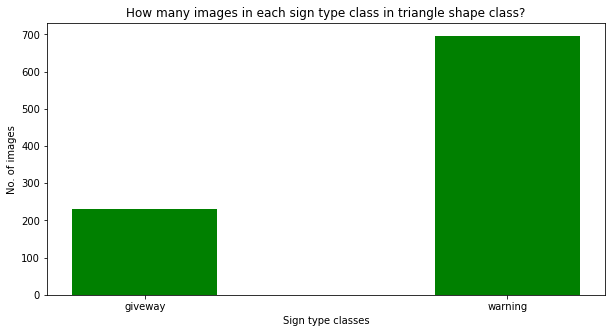

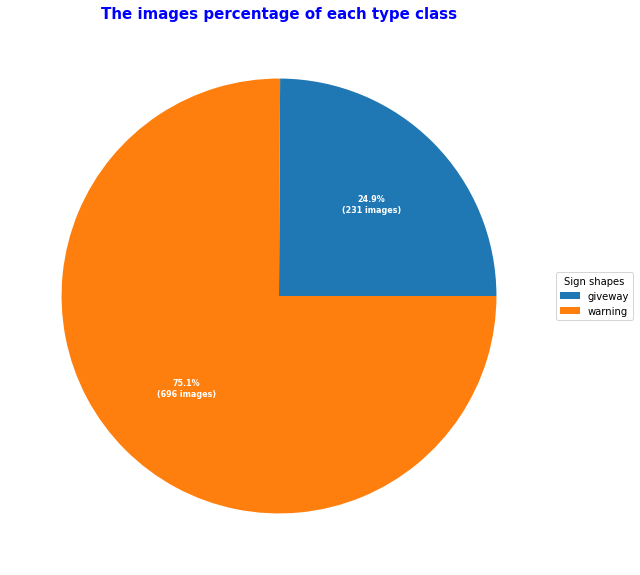

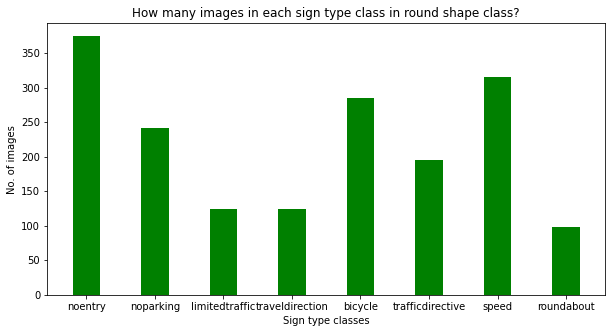

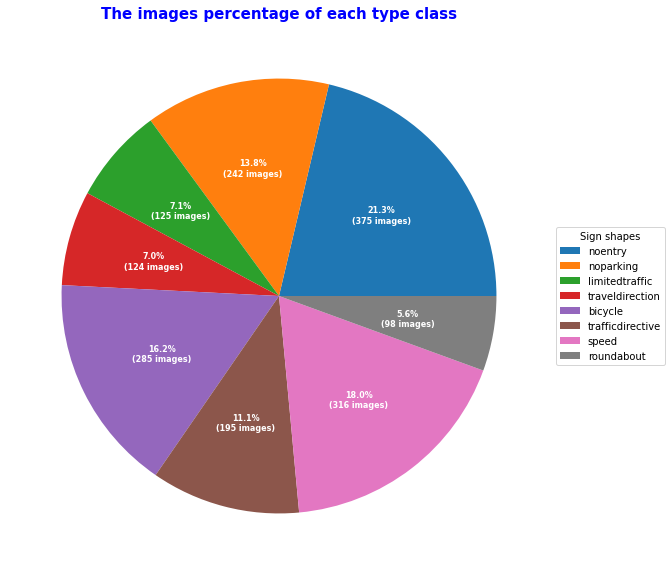

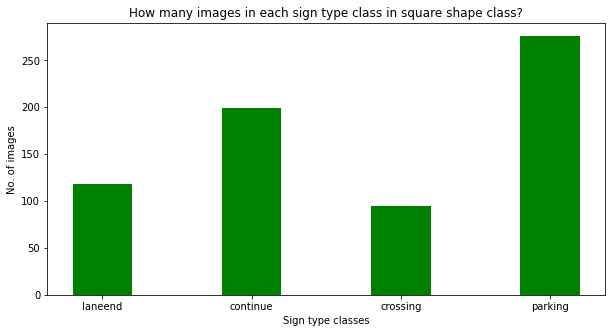

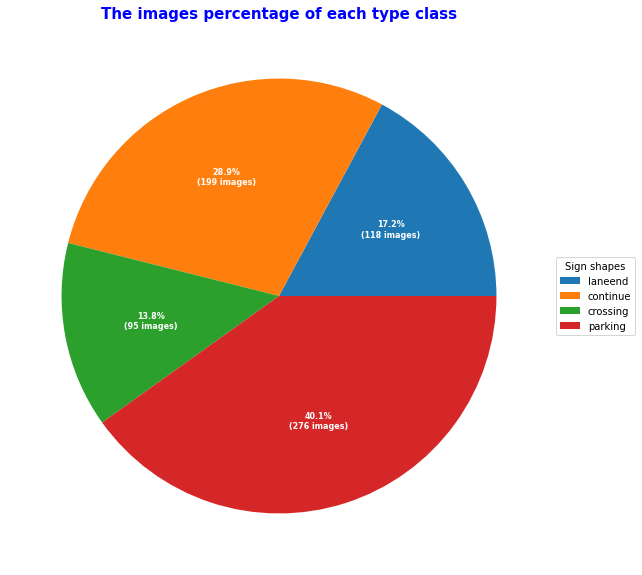

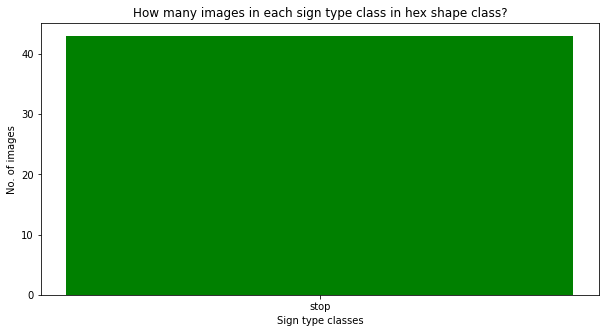

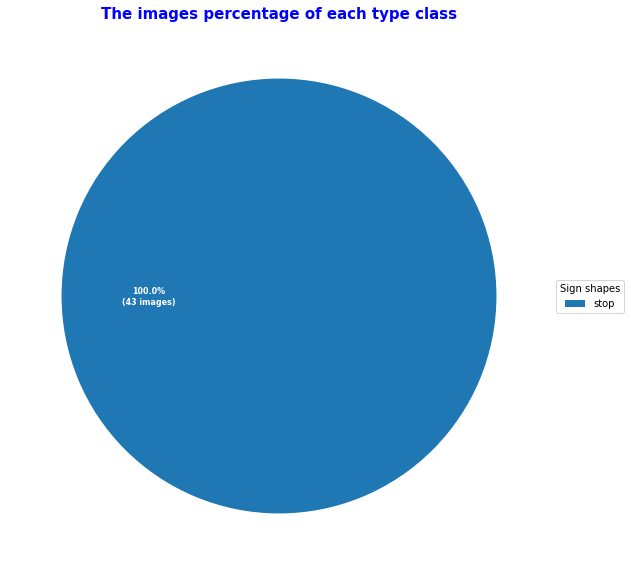

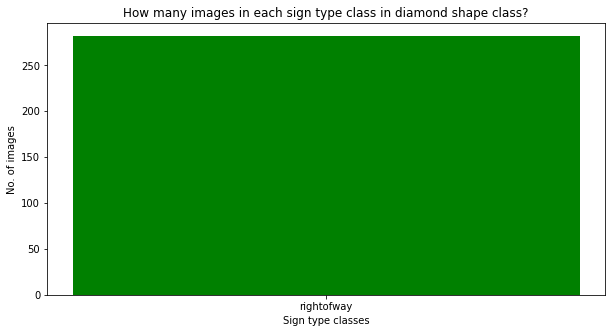

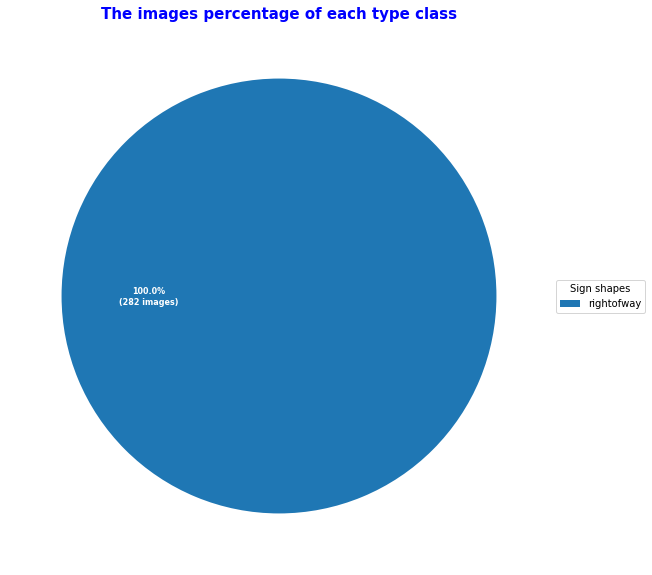

In [17]:
# as the previous plot we will create 2 plots for each sign shape class
# to visualize how many images and the percentage of each type class on it

# loop over shape classes
for key, value in data_dict.items():
        data = list(value['signTypes'].values())
        labels = list(value['signTypes'].keys())
        fig = plt.figure(figsize = (10, 5))

        # creating the bar plot
        plt.bar(labels, data, color ='g',
                width = 0.4)

        plt.xlabel("Sign type classes")
        plt.ylabel("No. of images")
        plt.title(f"How many images in each sign type class in {key} shape class?")
        plt.show()

        fig, ax = plt.subplots(figsize=(30, 10), subplot_kw=dict(aspect="equal"))


        wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: calc_percent_abs(pct, data),
                                        textprops=dict(color="w"))

        ax.legend(wedges, labels,
                title="Sign shapes",
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8, weight="bold")
        ax.set_title("The images percentage of each type class", fontsize=15, color= 'blue', fontweight='bold')

        plt.show()


### Conclusions

- The sign shape classes has imbalanced data,so we may use F-Score instead of accuracy as evaluation metric for better results.
- Two of sign shape classes (diamond, hex) has only one sign shape class so, there is no need to create model for type classification fr these two shape classes
- The triangle sign shape class has only two classes in sign types so it's a binary classification problem, also it's sign type classes has imbalanced data so we may use F-Score instead of accuracy as evaluation metric for better results.
- The round and square sign shape classes has more tha two classes in sign types so it's a multi class classification problem, also it's sign type classes has imbalanced data so we may use F-Score instead of accuracy as evaluation metric for better results.

